In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
airbnb = pd.read_csv("/Users/kate/Desktop/DSI UofT/LCR/01_materials/notebooks/dataset/listings.csv")
airbnb


,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [9]:
airbnb["price"].mean()

np.float64(249.16526273565984)

In [10]:
np.random.seed(100)
airbnb.sample(n=40)["price"].mean()

np.float64(222.875)

In [11]:
airbnb.sample(n=40)["price"].mean()

np.float64(315.25)

In [17]:
np.random.seed(100)
sample_list = []
for i in range(5_000):
    # for i in range(20_000): ("_" is just a visual separator)
    sample = airbnb.sample(n=40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)
    samples = pd.concat(sample_list)

KeyboardInterrupt: 

In [18]:
samples = pd.concat(
    airbnb.sample(n=40).assign(replicate=i) for i in range(5_000)
)


In [19]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name="sample_mean")

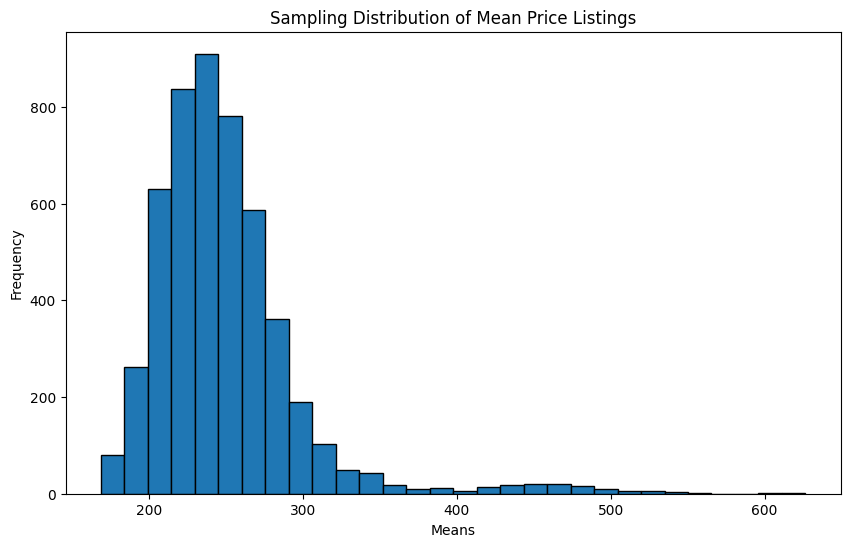

In [20]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')

# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()

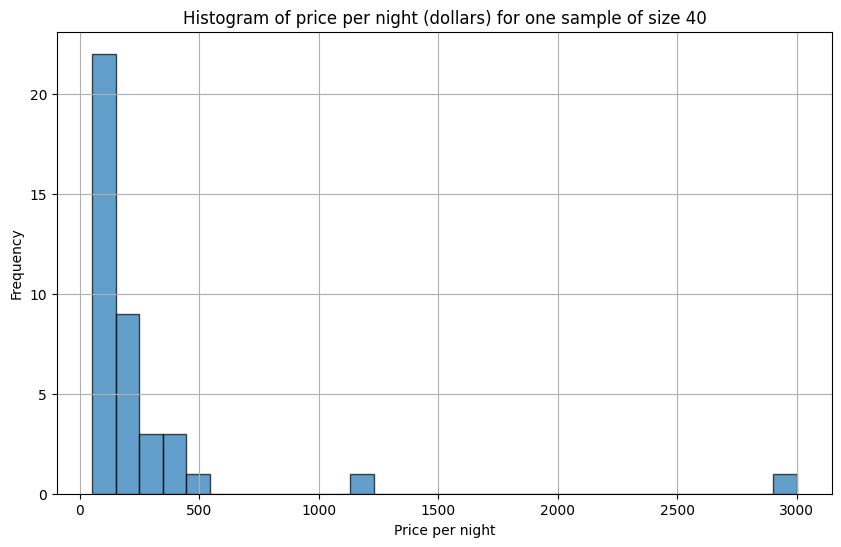

In [22]:
# Histogram of price per night (dollars) for one sample of size 40.
one_sample = airbnb.sample(n=40)

plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [23]:
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
2355,4.875684e+07,Mount Pleasant,Entire home/apt,2,1.0,1.0,1.0,179,0
4397,9.100000e+17,Shaughnessy,Entire home/apt,2,1.0,2.0,2.0,400,0
3381,7.090000e+17,Downtown,Entire home/apt,2,1.0,1.0,0.0,251,0
1085,2.494810e+07,Hastings-Sunrise,Private room,2,NaN,NaN,NaN,120,0
2441,5.016838e+07,Downtown Eastside,Private room,2,NaN,NaN,NaN,185,0
...,...,...,...,...,...,...,...,...,...
2016,4.219926e+07,Downtown,Entire home/apt,2,1.0,1.0,1.0,160,4999
3937,8.330000e+17,Downtown,Entire home/apt,4,1.0,2.0,2.0,312,4999
3207,6.740000e+17,West End,Entire home/apt,2,1.0,1.0,1.0,239,4999
4295,8.950000e+17,Downtown Eastside,Entire home/apt,4,1.0,2.0,2.0,382,4999


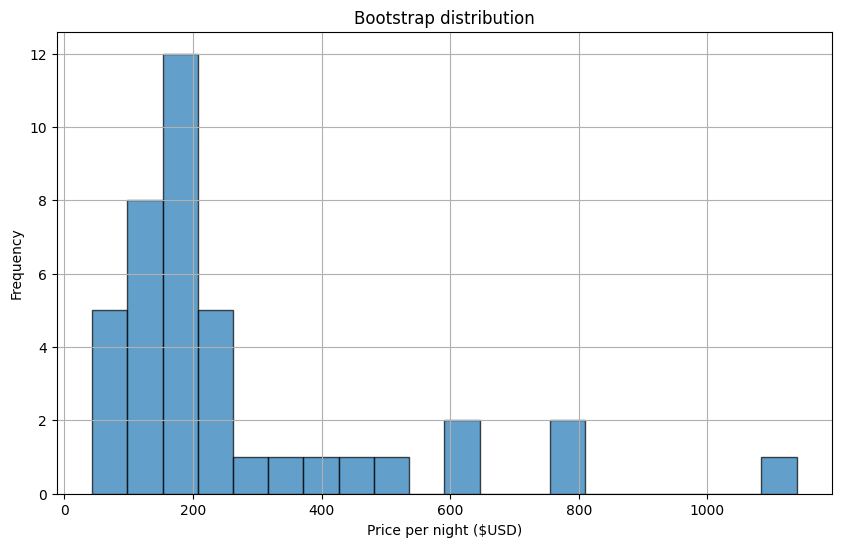

In [ ]:
# Plot the histogram of the bootstrap distribution
boot1 = airbnb.sample(n=40, replace=True)

# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means[“mean_price”], bins=30, edgecolor='black')

# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [46]:
bootstrap_samples = []
for i in range(20_000):
    sample = one_sample.sample(frac=1, replace=True)
    sample = sample.assign(replicate=i)
    bootstrap_samples.append(sample)
boot20000 = pd.concat(bootstrap_samples)

In [ ]:
boot_means = boot20000.groupby("replicate")["price"].mean().reset_index(name="mean_price")